In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1.1

Import the data, draw their histogram

(array([8.432e+03, 8.940e+02, 3.090e+02, 1.700e+02, 7.500e+01, 4.300e+01,
        2.500e+01, 2.400e+01, 2.100e+01, 7.000e+00]),
 array([ 100. ,  262.6,  425.2,  587.8,  750.4,  913. , 1075.6, 1238.2,
        1400.8, 1563.4, 1726. ]),
 <BarContainer object of 10 artists>)

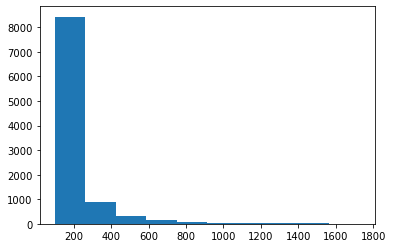

In [2]:
obs = list(dict(nx.generators.barabasi_albert_graph(10000, 100).degree).values())
plt.hist(obs)

# 1.2

Correct the scale of the plot’s axes to double logarithmic

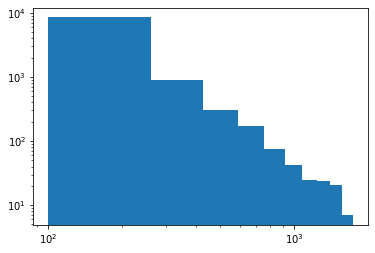

In [3]:
plt.hist(obs)
plt.yscale('log')
plt.xscale('log')

# 1.3

Apply logarithmic binning as well

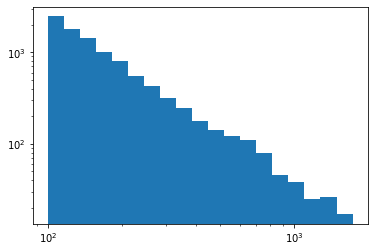

In [4]:
loglog_hist =plt.hist(obs, bins=np.exp(np.linspace(np.log(min(obs)), np.log(max(obs)), 20)))
plt.yscale('log')
plt.xscale('log')

# 1.4

Compute and draw the survival function

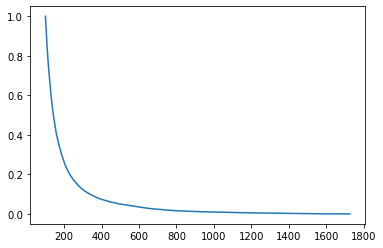

In [5]:
def survival(x: float, obs=obs) -> float:
    cdf = len(list(filter(lambda v: v<x, obs)))/len(obs) # nr of observations less than x/nr of observations
    return 1-cdf
x_to_plot=np.unique(obs)
y_to_plot=[survival(x) for x in x_to_plot]
plt.plot(x_to_plot, y_to_plot)

# 1.5

Which chart is the most readable? Which is most robust for the noise?

## 1.6

In [6]:
from sklearn.linear_model import LinearRegression
log_y = loglog_hist[0].reshape(-1,1)
log_x = np.array([(a+b)/2 for a,b in zip(loglog_hist[1][:-1], loglog_hist[1][1:], )]).reshape(-1,1) # middles of the intervals
model = LinearRegression(fit_intercept=True).fit(log_x, log_y)
model.coef_, model.intercept_

(array([[-0.98297144]]), array([1078.6519461]))

$$
\alpha = -1.06\\
\beta = 1089\\
log(y) = \alpha log(x) +\beta\\
y = e^\beta x^\alpha \\
\therefore y \sim C\frac{1}{x}$$

# 1.7

$$ 
L(x; \alpha ) = \prod_{i=1}^n \big [ \frac{\alpha-1}{x_{min}}(\frac{x_i}{x_{min}})^{-a} \big ]\\
\log L(x; \alpha ) = n\log(\alpha-1) - (\alpha+1)\log(x_{min}) -\alpha\sum_{i=1}^n log(x_i)
$$


$$
\frac{d}{d\alpha} \log L(x; \alpha ) = \frac{n}{\alpha-1} - log(x_{min}) - \sum_{i=1}^n log(x_i) \\
\frac{d}{d\alpha} \log L(x; \alpha ) = 0 \Leftrightarrow \alpha = 1 + \frac{n} { log(x_{min}) + \sum_{i=1}^n log(x_i)}
$$

In [7]:
def mle(obs):
    x_min = min(obs)
    return 1+ len(obs)/(np.log(x_min) + sum(np.log(obs)))
mle(obs)

1.1953781118220035

# 4.3

In [8]:
def avg_degree(G: nx.Graph, k: int) -> float:
    dg =  dict(G.degree)
    k_nodes = [n for n, v in dg.items() if v==k] 
    averages = list(sum(dg[i] for i in G.neighbors(node))/k
            for node in k_nodes) ## list of Average degree of the nearest node for each node of degree k 
    return np.mean(averages)

(0.0, 265.8589147286822)

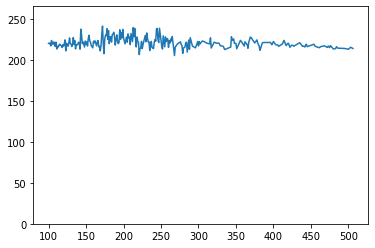

In [9]:
G = nx.generators.barabasi_albert_graph(1000, 100)
X = np.unique(list(dict(G.degree).values()))
Y = list(map(lambda x: avg_degree(G, x), X))
plt.plot(X, Y)
plt.ylim(0, max(Y)*1.1)

# 4.4

(0.0, 260.01800000000003)

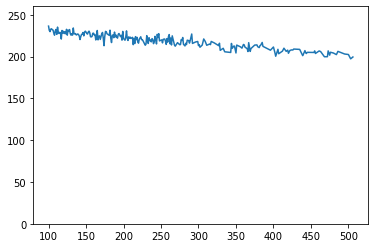

In [10]:
G = nx.algorithms.swap.double_edge_swap(G, nswap=len(G.edges)//1.3, max_tries=len(G.edges)*2)
X = np.unique(list(dict(G.degree).values()))
Y = list(map(lambda x: avg_degree(G, x), X))
plt.plot(X, Y)
plt.ylim(0, max(Y)*1.1)

## 5

In [11]:
def summary(G : nx.graph, name='', directed=False) -> dict:
    degrees = list(dict(G.degree).values())
    return {
        'name': name,
        'directed': directed,
        'N' : len(G.nodes),
        'E' : len(G.edges),
        '<k>': np.mean(degrees),
        'a': mle(degrees),
        'l': nx.average_shortest_path_length(G),
        'r': nx.degree_pearson_correlation_coefficient(G)
    }
pd.DataFrame([summary(nx.generators.barabasi_albert_graph(10000, 100))])

,name,directed,N,E,<k>,a,l,r
0,,False,10000,990000,198.0,1.195352,2.016103,0.007675
